# Step 1: Loading the Data

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

df = pd.read_csv('Netflix TV Shows and Movies.csv')

# Step 2: Understanding the Data

In [31]:
# Display the first few rows
print(df.head())

# Summary statistics
print(df.describe())

# Information about columns and data types
print(df.info())

   index        id                            title   type  \
0      0   tm84618                      Taxi Driver  MOVIE   
1      1  tm127384  Monty Python and the Holy Grail  MOVIE   
2      2   tm70993                    Life of Brian  MOVIE   
3      3  tm190788                     The Exorcist  MOVIE   
4      4   ts22164     Monty Python's Flying Circus   SHOW   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  King Arthur, accompanied by his squire, recrui...          1975   
2  Brian Cohen is an average young Jewish man, bu...          1979   
3  12-year-old Regan MacNeil begins to adapt an e...          1973   
4  A British sketch comedy series with the shows ...          1969   

  age_certification  runtime    imdb_id  imdb_score  imdb_votes  
0                 R      113  tt0075314         8.3    795222.0  
1                PG       91  tt0071853         8.2    530877.0  
2       

In [32]:
# Check for missing values
print(df.isnull().sum())

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64


I'm not replacing

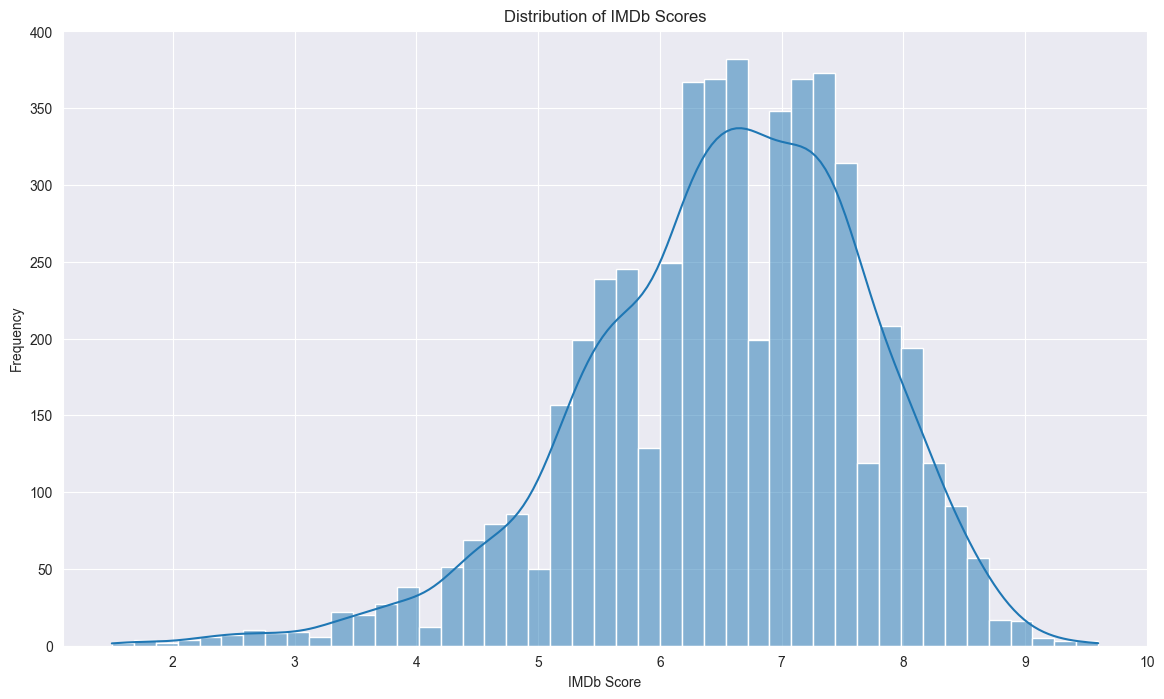

In [33]:


# Set the size of the figure
plt.figure(figsize=(14, 8))  # Adjust the dimensions as needed

# Visualizing distribution of IMDb scores
sns.histplot(df['imdb_score'], kde=True)
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Scores')
plt.show()

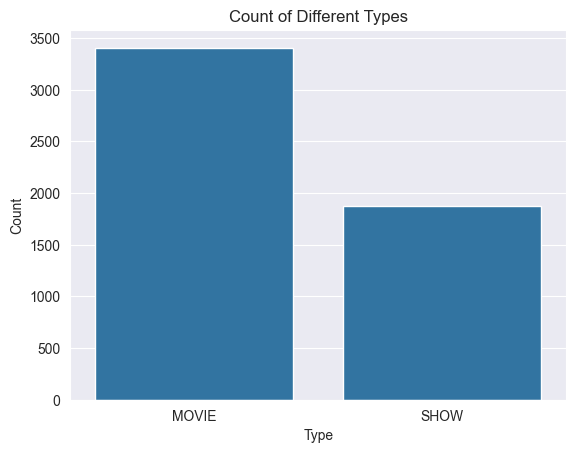

In [34]:
# Count of different types (MOVIE, SHOW, etc.)
sns.countplot(x='type', data=df)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Different Types')
plt.show()


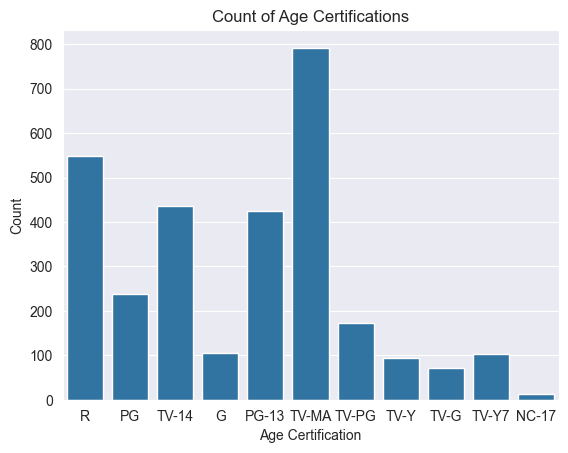

In [35]:
# Count of age certifications
sns.countplot(x='age_certification', data=df)
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.title('Count of Age Certifications')
plt.show()

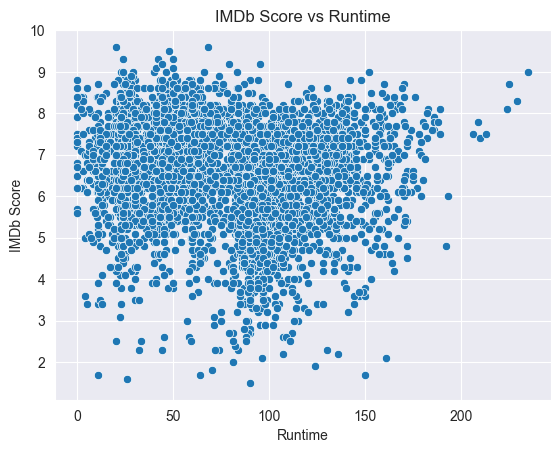

In [36]:
# Relationship between IMDb score and runtime
sns.scatterplot(x='runtime', y='imdb_score', data=df)
plt.xlabel('Runtime')
plt.ylabel('IMDb Score')
plt.title('IMDb Score vs Runtime')
plt.show()


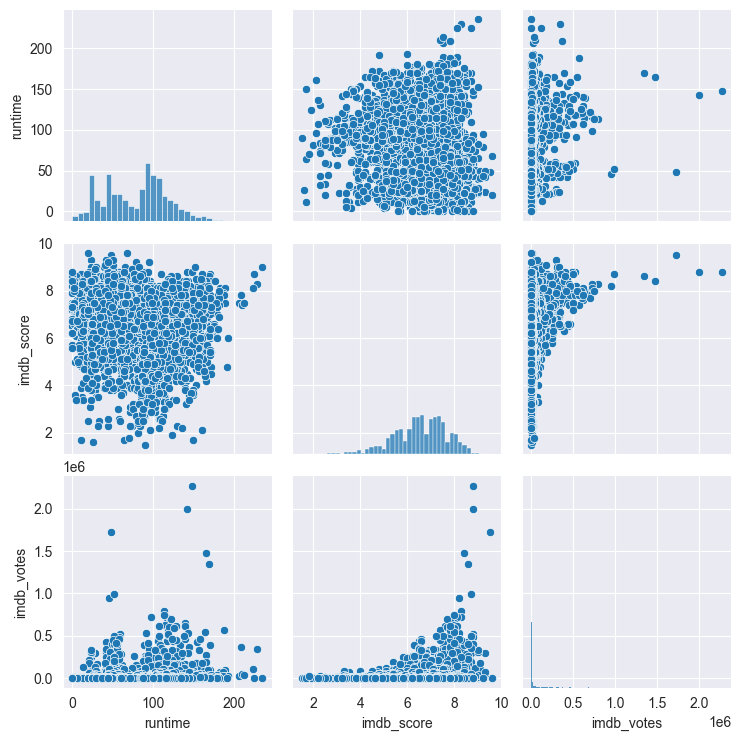

In [37]:

# Pairwise relationships between numerical variables
sns.pairplot(df[['runtime', 'imdb_score', 'imdb_votes']])
plt.show()

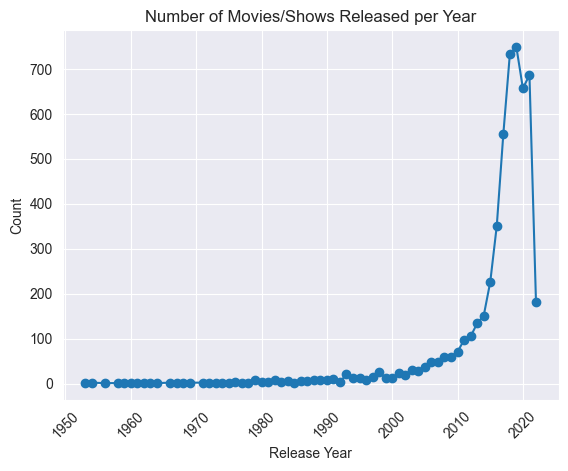

In [38]:
# Number of movies/shows released per year
yearly_counts = df['release_year'].value_counts().sort_index()
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Number of Movies/Shows Released per Year')
plt.xticks(rotation=45)
plt.show()


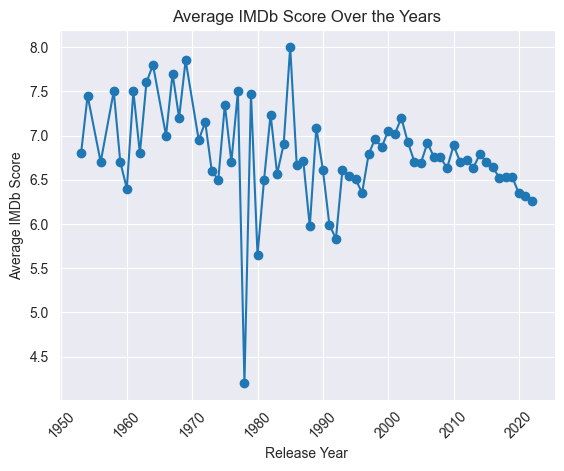

In [39]:
# Average IMDb scores over the years
yearly_mean_score = df.groupby('release_year')['imdb_score'].mean()
plt.plot(yearly_mean_score.index, yearly_mean_score.values, marker='o')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Score Over the Years')
plt.xticks(rotation=45)
plt.show()

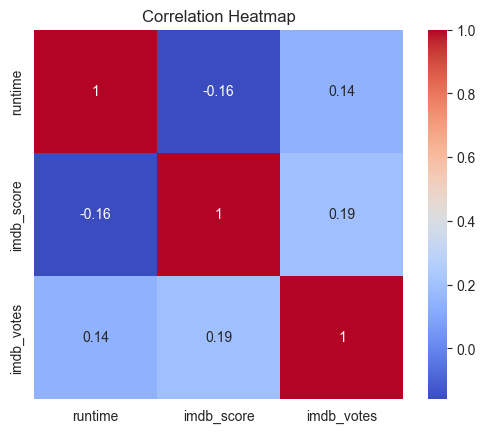

In [40]:
# Correlation heatmap
correlation = df[['runtime', 'imdb_score', 'imdb_votes']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

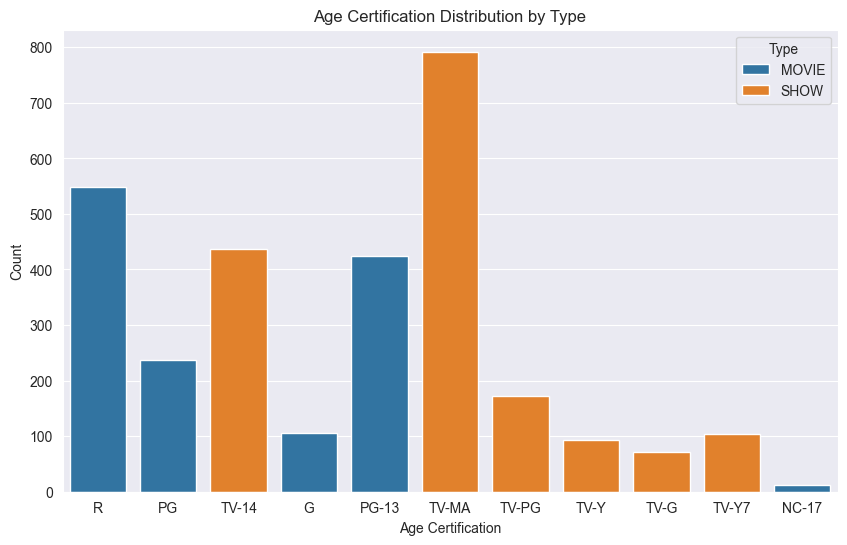

In [41]:
# Age certification distribution by type
plt.figure(figsize=(10, 6))
sns.countplot(x='age_certification', hue='type', data=df)
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.title('Age Certification Distribution by Type')
plt.legend(title='Type')
plt.show()

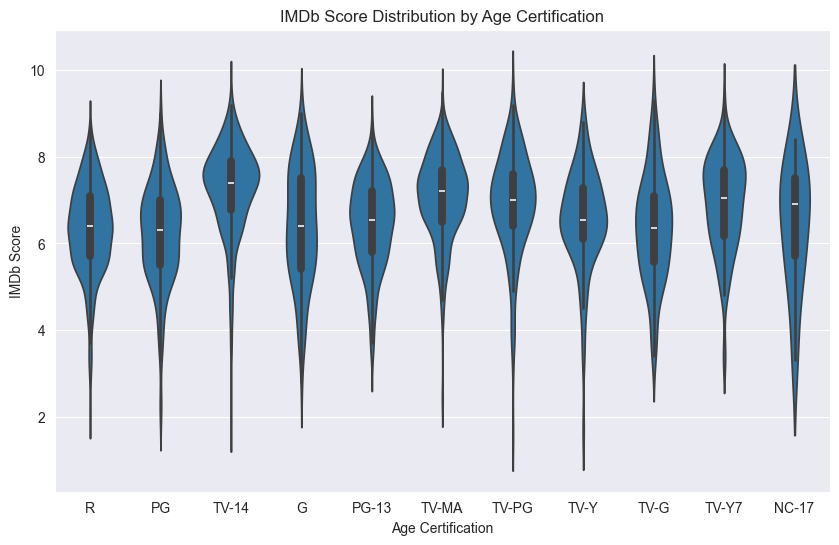

In [42]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='age_certification', y='imdb_score', data=df)
plt.xlabel('Age Certification')
plt.ylabel('IMDb Score')
plt.title('IMDb Score Distribution by Age Certification')
plt.show()

In [43]:
import plotly.express as px

# Scatter plot for IMDb scores vs. IMDb votes
fig = px.scatter(df, x='imdb_votes', y='imdb_score', title='IMDb Scores vs. IMDb Votes')
fig.update_layout(xaxis_title='IMDb Votes', yaxis_title='IMDb Score')
fig.show()

In [44]:
# Boxplot for IMDb scores by type
fig = px.box(df, x='type', y='imdb_score', title='Boxplot of IMDb Scores by Type')
fig.update_layout(xaxis_title='Type', yaxis_title='IMDb Score')
fig.show()

In [45]:
# Time series of movies/shows released per year
yearly_counts = df['release_year'].value_counts().sort_index().reset_index()
yearly_counts.columns = ['Release Year', 'Count']

fig = px.line(yearly_counts, x='Release Year', y='Count', title='Number of Movies/Shows Released per Year')
fig.update_layout(xaxis_title='Release Year', yaxis_title='Count')
fig.show()

In [46]:
# Creating a stacked bar chart for count of age certifications by type
age_cert_type = df.groupby(['type', 'age_certification']).size().unstack().fillna(0)

fig = go.Figure(data=[
    go.Bar(name=age, x=age_cert_type.index, y=age_cert_type[age]) for age in age_cert_type.columns
])
fig.update_layout(
    barmode='stack',
    xaxis=dict(title='Type'),
    yaxis=dict(title='Count'),
    title='Count of Age Certifications by Type'
)
fig.show()

In [47]:
# Pie chart for distribution of types
type_counts = df['type'].value_counts()

fig = px.pie(
    values=type_counts.values,
    names=type_counts.index,
    title='Distribution of Types'
)
fig.show()

In [48]:
fig = px.scatter_3d(df, x='imdb_votes', y='runtime', z='imdb_score', title='IMDb Scores vs Votes vs Runtime')
fig.update_layout(scene=dict(xaxis_title='IMDb Votes', yaxis_title='Runtime', zaxis_title='IMDb Score'))
fig.show()

In [49]:
# Grouping data by release year and calculating average IMDb score
yearly_mean_score = df.groupby('release_year')['imdb_score'].mean().reset_index()

fig = px.line(yearly_mean_score, x='release_year', y='imdb_score', title='IMDb Score Trends Over Years')
fig.update_layout(xaxis_title='Release Year', yaxis_title='Average IMDb Score')
fig.show()

In [50]:
top_scores = df.sort_values(by='imdb_score', ascending=False).head(10)

fig = px.treemap(top_scores, path=['title'], values='imdb_score', title='Top IMDb Scores by Title')
fig.show()

In [51]:
fig = px.parallel_coordinates(df[['imdb_score', 'imdb_votes', 'runtime']], title='IMDb Scores, Votes, and Runtime')
fig.show()

In [52]:
fig = px.box(df, x='release_year', y='imdb_score', title='Distribution of IMDb Scores by Release Year')
fig.update_layout(xaxis_title='Release Year', yaxis_title='IMDb Score')
fig.show()

In [53]:
top_scores_per_year = df.groupby('release_year').apply(lambda x: x.nlargest(3, 'imdb_score')).reset_index(drop=True)

fig = px.bar(top_scores_per_year, x='imdb_score', y='title', color='release_year', 
             orientation='h', animation_frame='release_year', 
             title='Top IMDb Scores Over Time')
fig.update_layout(xaxis_title='IMDb Score', yaxis_title='Title')
fig.show()

In [54]:
fig = px.parallel_categories(df, dimensions=['age_certification', 'imdb_score'], 
                             title='IMDb Scores by Age Certification')
fig.show()